#CMPE 297 - Assignment 4 - Part 3
##Deep AutoVIML - Chest Cancer Classification from X-ray images
[Code Reference](https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_Image_Classification_Demo.ipynb)  

#1.0 Load libraries

In [6]:
!pip install deep_autoviml

     |████████████████████████████████| 269 kB 28.7 MB/s 
     |████████████████████████████████| 308 kB 56.5 MB/s 
     |████████████████████████████████| 4.4 MB 26.1 MB/s 
     |████████████████████████████████| 23.2 MB 1.9 MB/s 
     |████████████████████████████████| 170 kB 24.8 MB/s 
     |████████████████████████████████| 14.5 MB 16.3 MB/s 
     |████████████████████████████████| 209 kB 58.3 MB/s 
     |████████████████████████████████| 80 kB 9.6 MB/s 
     |████████████████████████████████| 75 kB 4.8 MB/s 
     |████████████████████████████████| 111 kB 45.8 MB/s 
     |████████████████████████████████| 144 kB 63.5 MB/s 
     |████████████████████████████████| 49 kB 7.0 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=ea4041c63db139435e20261c6afc40893204acd4c6c5c17b28e74caa80ebc4f0
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
  Created wheel for pyperclip: filename=pyperclip-1.8

In [8]:
from deep_autoviml import deep_autoviml as deepauto
import pandas as pd
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


#2.0 Load the chest cancer X-ray dataset
[Dataset](https://www.kaggle.com/mohamedhanyyy/chest-ctscan-images)    

In [2]:
! pip install kaggle
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [39]:
! kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

 99% 117M/119M [00:01<00:00, 88.9MB/s] 
100% 119M/119M [00:01<00:00, 86.0MB/s]


In [40]:
! unzip chest-ctscan-images

Archive:  chest-ctscan-images.zip
  inflating: Data/test/adenocarcinoma/000108 (3).png  
  inflating: Data/test/adenocarcinoma/000109 (2).png  
  inflating: Data/test/adenocarcinoma/000109 (4).png  
  inflating: Data/test/adenocarcinoma/000109 (5).png  
  inflating: Data/test/adenocarcinoma/000112 (2).png  
  inflating: Data/test/adenocarcinoma/000113 (7).png  
  inflating: Data/test/adenocarcinoma/000114 (5).png  
  inflating: Data/test/adenocarcinoma/000114.png  
  inflating: Data/test/adenocarcinoma/000115 (4).png  
  inflating: Data/test/adenocarcinoma/000115 (8).png  
  inflating: Data/test/adenocarcinoma/000115.png  
  inflating: Data/test/adenocarcinoma/000116 (5).png  
  inflating: Data/test/adenocarcinoma/000116 (7).png  
  inflating: Data/test/adenocarcinoma/000116 (9).png  
  inflating: Data/test/adenocarcinoma/000117 (4).png  
  inflating: Data/test/adenocarcinoma/000117 (8).png  
  inflating: Data/test/adenocarcinoma/000117.png  
  inflating: Data/test/adenocarcinoma/00011

## 2.1 Inspect random train, test chest cancer images

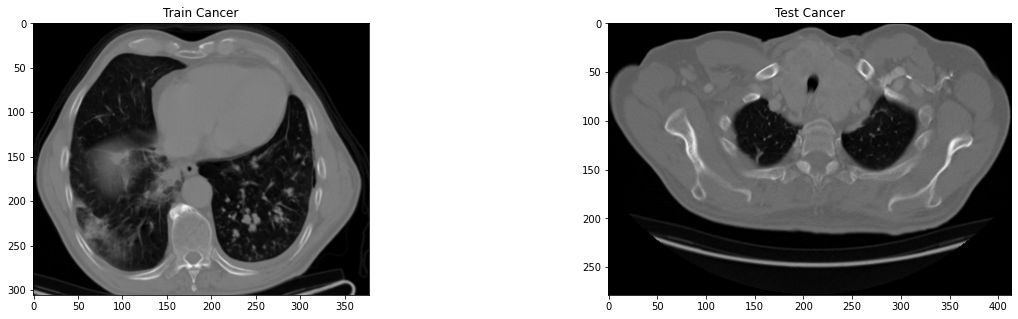

In [41]:
f, axarr = plt.subplots(1,2, figsize=(20,5)) 
train_sample = 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000069.png'
test_sample = 'large.cell.carcinoma/000170.png'
trainpath = '/content/Data/train/'
testpath = '/content/Data/test/'

axarr[0].imshow(Image.open(trainpath+train_sample))
axarr[0].set(title = "Train Cancer")

axarr[1].imshow(Image.open(testpath+test_sample))
axarr[1].set(title = "Test Cancer")

plt.show()

#4.0 Deep Auto Vimil

##4.1. Model Config

In [43]:
image_dir = '/content/Data/'
target = 'image'
img_height   = 224
img_width    = 224
img_channels = 3 

project_name = "Chest Classifier"
keras_model_type =  "image" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 3} 
model_options = {'tuner':"optuna", "max_trials":2, 'cat_feat_cross_flag':True, 
                 'image_directory': image_dir, 'image_height': img_height, 
                 'image_width':img_width, 'image_channels':img_channels }

## 4.2. Model Train

    Only CPU found on this device
Setting CPU strategy using 1 devices
    Image directory given as /content/Data/
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory /content/Data/. Returning...
Found 613 files belonging to 4 classes.

Splitting train into two: train and validation data
Number of image classes = 4 and they are: ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']
Training image model. This will take time...
Epoch 1/3
5/5 [==============================] - 19s 3s/step - loss: 1.6098 - accuracy: 0.2662 - val_loss: 1.2215 - val_accuracy: 0.4609
Epoch 2/3
5/5 [==============================] - 10s 2s/step - loss: 1.3079 - accuracy: 0.3925 - val_loss: 0.9759 - val_accuracy: 0.5938
Epoch 3/3
2/2 [==============================] - 3s 2s/step - loss: 0.8776 - acc

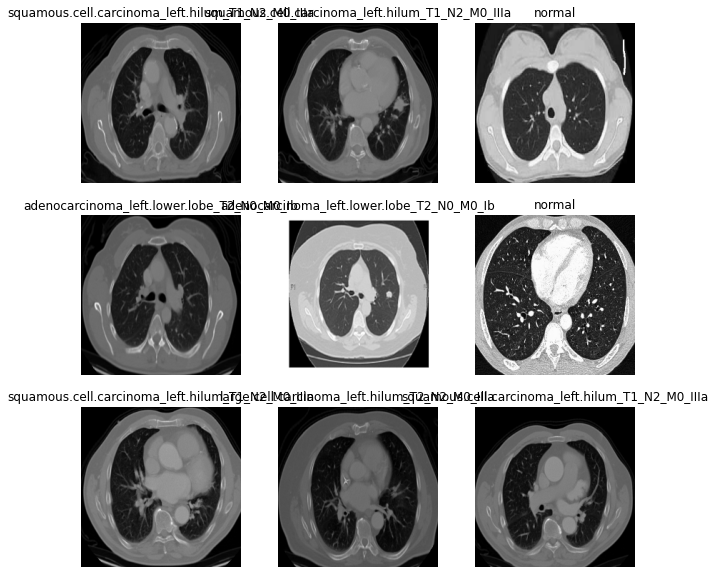

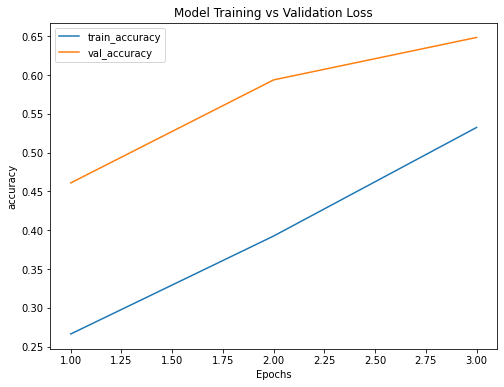

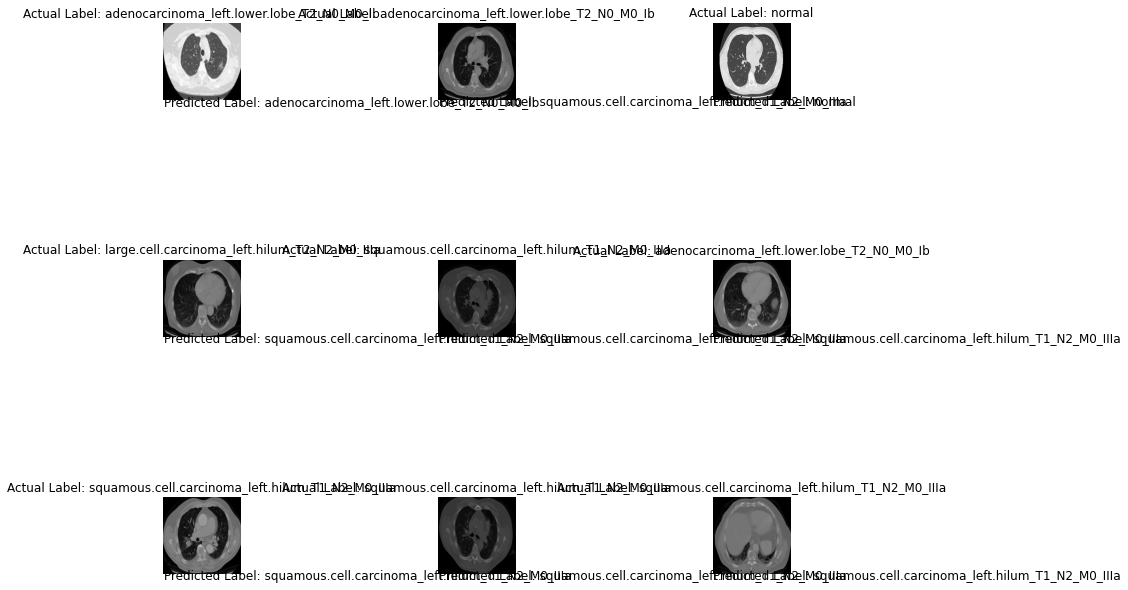

In [44]:
model, dicti = deepauto.fit("", target, keras_model_type=keras_model_type, 
                            project_name=project_name, save_model_flag=False, 
                            model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)

##4.3. Model Predict

In [46]:
test_image_dir = image_dir + '/test'
predictions = deepauto.predict_images(test_image_dir, model, dicti, keras_model_type)


Loading deep_autoviml model from <keras.engine.sequential.Sequential object at 0x7fcbe75ac050> folder. This will take time...

Using <keras.engine.sequential.Sequential object at 0x7fcbe75ac050> model provided as input...
Time taken to load saved model = 0 seconds
    loading and predicting on folder: /content/Data//test
Found 315 files belonging to 4 classes.
    Sample predictions before inverse_transform: [0 3 0 2 0]
    Sample predictions after inverse_transform: ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib' 'normal'
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']


In [48]:
import tensorflow as tf
test_ds = tf.keras.preprocessing.image_dataset_from_directory(testpath,
                                                              seed=101,
                                                              image_size=(img_height, img_width),
                                                              batch_size=128)

Found 315 files belonging to 4 classes.


In [49]:
model.evaluate(test_ds)

3/3 [==============================] - 9s 2s/step - loss: 1.0543 - accuracy: 0.5175


[1.0542525053024292, 0.5174603462219238]